# イントロダクション
## Numpyによる行列操作

In [1]:
import numpy as np

In [61]:
# 1. 要素がすべて0の3x3行列
A = np.zeros((3, 3))
print("A:", A)

A: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [62]:
print(A.shape)

(3, 3)


In [63]:
# 2. 要素がすべて1の2x4行列
B = np.ones((2, 4))
print("B:", B)

B: [[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [64]:
C = np.array([[1, 2], [3, 4]])
print("C:", C)

C: [[1 2]
 [3 4]]


In [65]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# 1. 行列の加算
C = A + B
print("A + B:", C)

# 2. 行列の減算
D = A - B
print("A - B:", D)

A + B: [[ 6  8]
 [10 12]]
A - B: [[-4 -4]
 [-4 -4]]


In [66]:
# 行列の乗算
C = A @ B  # または np.dot(A, B)
print("A @ B:", C)

A @ B: [[19 22]
 [43 50]]


In [67]:
# 転置
print(C.T)

[[19 43]
 [22 50]]


In [68]:
# スライス
A = np.array([[1, 2, 5], [3, 4, 1]])
print(A)
print(A.shape)

[[1 2 5]
 [3 4 1]]
(2, 3)


In [69]:
print(A[:1,:])

[[1 2 5]]


In [70]:
print(A[:,1:3])

[[2 5]
 [4 1]]


In [71]:
matrix_3d = np.array([[[1, 2], [3, 4], [5, 6], [7, 8]],
                     [[9, 10], [11, 12], [13, 14], [15, 16]],
                     [[17, 18], [19, 20], [21, 22], [23, 24]]])

print("3次元行列:", matrix_3d)
print("形状:", matrix_3d.shape)  # (3, 4, 2) を出力

3次元行列: [[[ 1  2]
  [ 3  4]
  [ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]
  [13 14]
  [15 16]]

 [[17 18]
  [19 20]
  [21 22]
  [23 24]]]
形状: (3, 4, 2)


In [72]:
# 3次元の行列の最初の2つの次元（平面）を取得
slice1 = matrix_3d[:2, :, :]
print("最初の2つの次元:", slice1)

最初の2つの次元: [[[ 1  2]
  [ 3  4]
  [ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]
  [13 14]
  [15 16]]]


In [73]:
# reshape：形状の変更
reshaped_matrix = matrix_3d.reshape(2, 6, 2)
print("形状変更後の行列:\n", reshaped_matrix)
print("新しい形状:", reshaped_matrix.shape)  # (2, 6, 2) を出力


形状変更後の行列:
 [[[ 1  2]
  [ 3  4]
  [ 5  6]
  [ 7  8]
  [ 9 10]
  [11 12]]

 [[13 14]
  [15 16]
  [17 18]
  [19 20]
  [21 22]
  [23 24]]]
新しい形状: (2, 6, 2)


In [74]:
# reshapeで自動的な次元調整
arr_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
arr_2d

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [75]:
arr_3d = arr_2d.reshape(2, 2, -1)
arr_3d

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [76]:
arr_3d.shape

(2, 2, 2)

In [77]:
arr_3d = arr_2d.reshape(2, 4, -1)
arr_3d.shape

(2, 4, 1)

In [2]:
# 要素の追加 append
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5])
arr = np.append(arr1, arr2)
print(arr)

[1 2 3 4 5]


## 古典的な画像処理手法
sample1.pngをアップロードし、読み込んで使用する

### フィルタリング

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

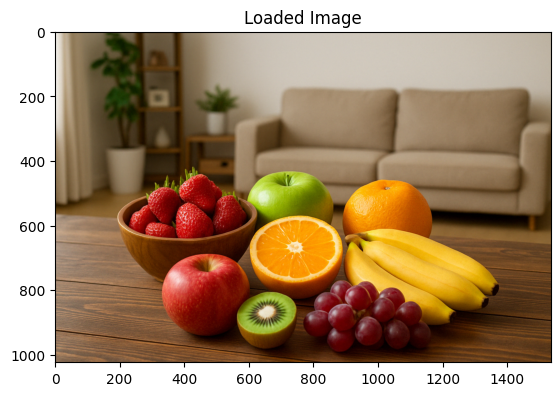

In [79]:
# 画像の読み込み
img = Image.open("sample1.png")

# 画像の表示
plt.imshow(img)
plt.title("Loaded Image")
plt.show()

In [80]:
# 画像データをNumPy配列に変換
img_array = np.array(img)

# 画像情報の出力
print("画像のサイズ:", img.size)  # 画像の幅と高さ
print("画像のモード:", img.mode)  # 画像のカラーモード（RGB、RGBA、Lなど）
print("NumPy配列の形状:", img_array.shape) # 配列の形状（高さ、幅、チャンネル数）

画像のサイズ: (1536, 1024)
画像のモード: RGB
NumPy配列の形状: (1024, 1536, 3)


Text(0.5, 1.0, 'Blurred Image (Gaussian)')

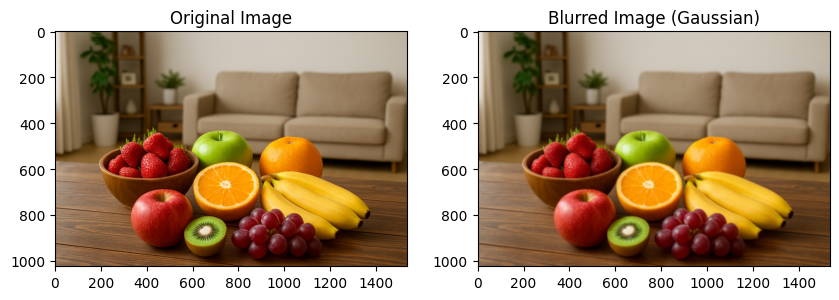

In [81]:
# ガウシアンフィルタを適用
blurred_img = cv2.GaussianBlur(img_array, (11, 11), 0)  # カーネルサイズ(5, 5), シグマは0で自動計算

# 結果の表示 (matplotlibを使用)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img) # OpenCVはBGRなのでRGBに変換
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(blurred_img) # OpenCVはBGRなのでRGBに変換
plt.title("Blurred Image (Gaussian)")

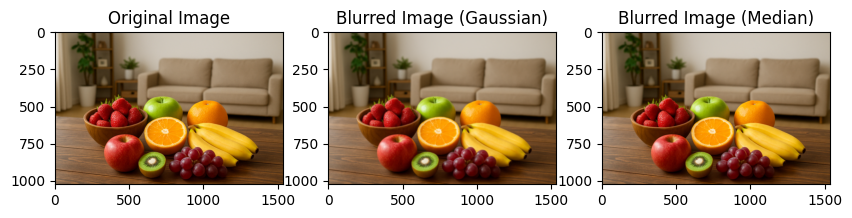

In [82]:
# メディアンフィルタを適用
median_blurred_img = cv2.medianBlur(img_array, 5)  # カーネルサイズ5

# 結果の表示 (matplotlibを使用)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img) # OpenCVはBGRなのでRGBに変換
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(blurred_img) # OpenCVはBGRなのでRGBに変換
plt.title("Blurred Image (Gaussian)")

plt.subplot(1, 3, 3)
plt.imshow(median_blurred_img)
plt.title("Blurred Image (Median)")

plt.show()


### エッジ処理

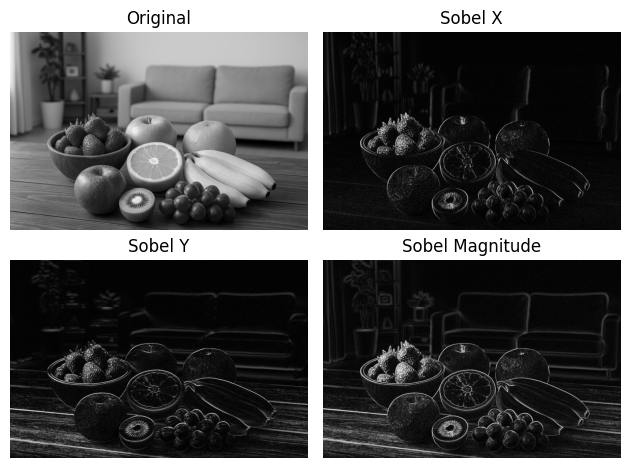

In [85]:
# 画像の読み込み（グレースケールで）
img = cv2.imread('sample1.png', cv2.IMREAD_GRAYSCALE)

# SobelフィルタでX方向のエッジ検出
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# SobelフィルタでY方向のエッジ検出
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# 勾配の大きさを計算
sobel_combined = cv2.magnitude(sobelx, sobely)

# 画像を表示（pltを使用）
# plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Sobel X')
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Sobel Y')
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Sobel Magnitude')
plt.imshow(cv2.convertScaleAbs(sobel_combined), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


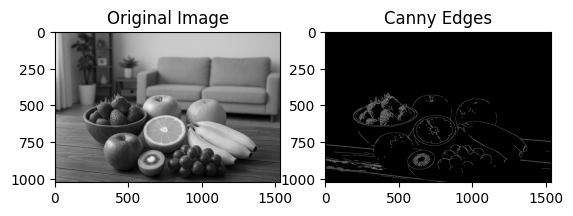

In [86]:
# Cannyエッジ検出
edges = cv2.Canny(img, 100, 200)  # 下限と上限の閾値を調整

# 結果の表示
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")

plt.show()

### 変換

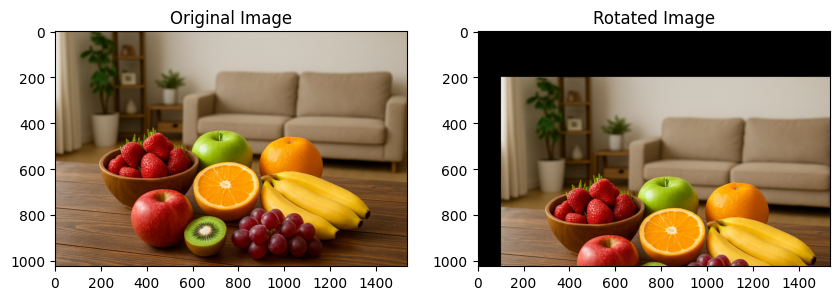

In [91]:
# 平行移動
# tx: x方向の移動量 (正の値で右方向、負の値で左方向)
# ty: y方向の移動量 (正の値で下方向、負の値で上方向)
tx, ty = 100, 200
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

# 画像の回転
translated_img = cv2.warpAffine(img_array, translation_matrix, (img_array.shape[1], img_array.shape[0]))

# 結果の表示
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(translated_img)
plt.title("Rotated Image")

plt.show()

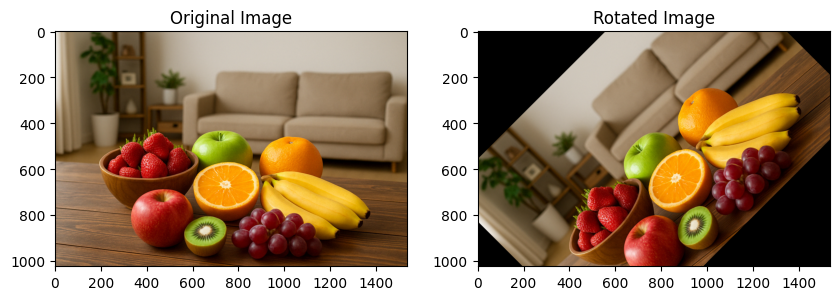

In [92]:
# 回転
center = (img_array.shape[1] / 2, img_array.shape[0] / 2)  # 画像の中心を回転中心とする
angle = 45  # 回転角度を45度に設定
scale = 1.0  # スケールを1.0に設定

# getRotationMatrix2D関数を使って回転行列を作成
rot_mat = cv2.getRotationMatrix2D(center, angle, scale)

# 画像の回転
translated_img = cv2.warpAffine(img_array, rot_mat, (img_array.shape[1], img_array.shape[0]))

# 結果の表示
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(translated_img)
plt.title("Rotated Image")

plt.show()

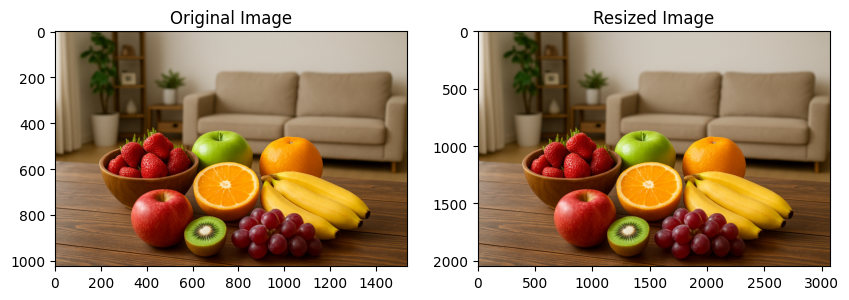

In [93]:
# スケールファクター (2倍に拡大)
scale_factor = 2

# 出力サイズを計算
width = int(img_array.shape[1] * scale_factor)
height = int(img_array.shape[0] * scale_factor)
dim = (width, height)

# resize関数でスケーリング
resized_img = cv2.resize(img_array, dim, interpolation=cv2.INTER_AREA)  # 拡大にはINTER_AREA、縮小にはINTER_LINEAR

# 結果の表示
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(resized_img)
plt.title("Resized Image")

plt.show()


### ヒストグラムの調整によるコントラスト調整

<ipython-input-103-a534a6ef179e>:14: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.flatten(), 256, [0, 256], color='r')


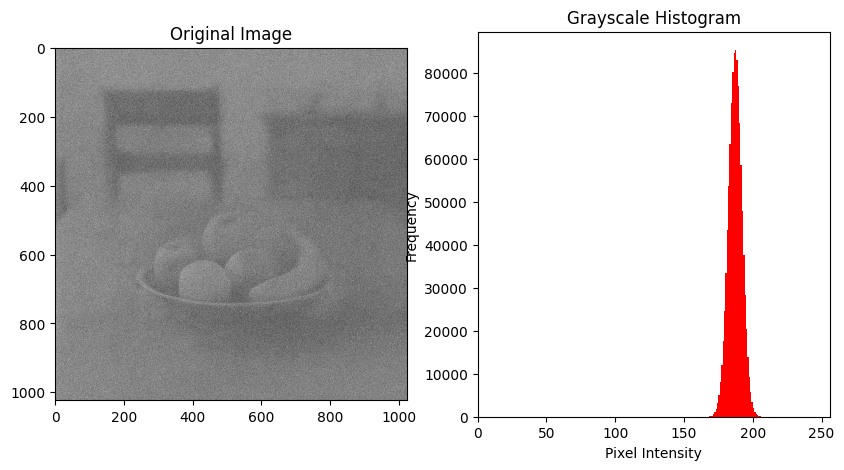

In [103]:
img = cv2.imread('sample3.png', cv2.IMREAD_GRAYSCALE)

# ヒストグラムの計算
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# 結果の表示
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

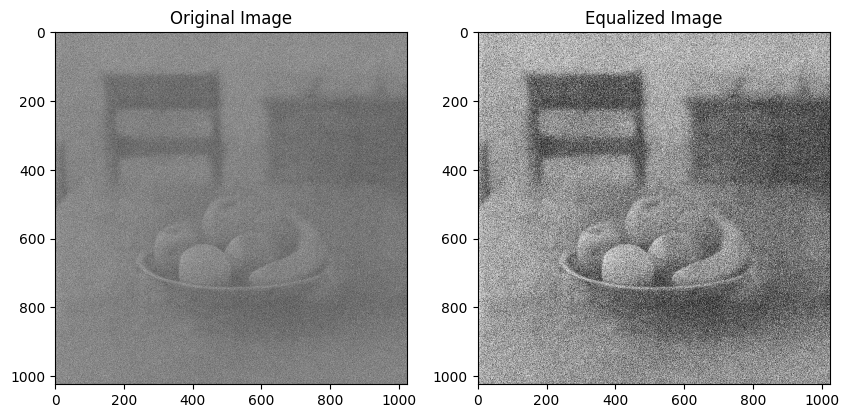

In [104]:
# ヒストグラム平坦化
equ = cv2.equalizeHist(img)

# 平坦化後のヒストグラムの計算
hist_eq, bins_eq = np.histogram(equ.flatten(), 256, [0, 256])

# 結果の表示
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title('Equalized Image')

plt.show()



<ipython-input-100-4a9a66b961a5>:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.flatten(), 256, [0, 256], color='r')


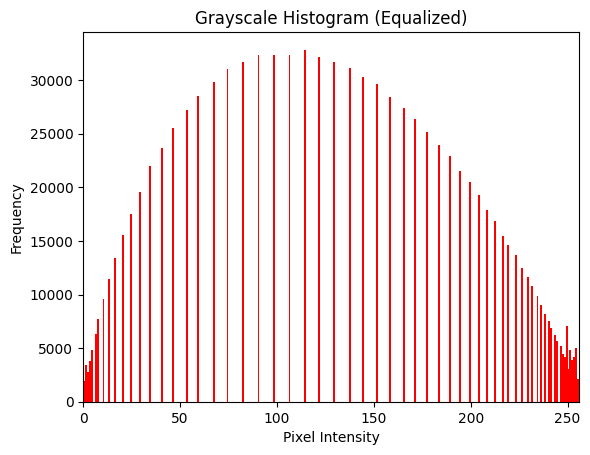

In [100]:
# 平坦化後のヒストグラムの表示
plt.hist(equ.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.title('Grayscale Histogram (Equalized)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

### 二値化

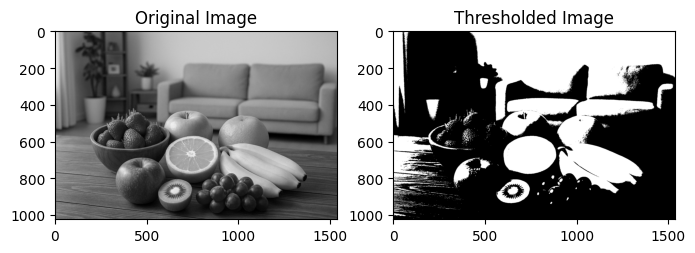

In [5]:
img = cv2.imread('sample1.png', cv2.IMREAD_GRAYSCALE)

# 二値化処理
ret, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 結果の表示
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(thresh_img, cmap='gray')
plt.title("Thresholded Image")

plt.show()


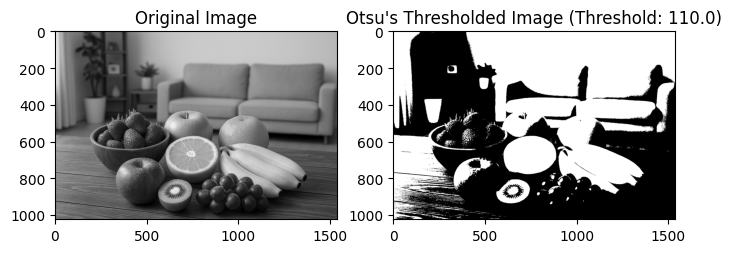

In [6]:
# 大津の二値化
ret, thresh_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 結果の表示
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(thresh_img, cmap='gray')
plt.title(f"Otsu's Thresholded Image (Threshold: {ret})")

plt.show()


In [7]:
cv2.THRESH_OTSU

8

In [8]:
cv2.THRESH_BINARY

0

In [9]:
ret

110.0

### テンプレートマッチング

(Text(0.5, 1.0, 'Detected Point'), ([], []), ([], []))

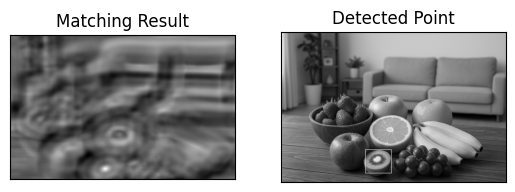

In [25]:
img = cv2.imread('sample1.png', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)

# テンプレートマッチング
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

# 最良の一致を見つける
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# 一致した位置を描画
top_left = max_loc
h, w = template.shape
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img, top_left, bottom_right, 255, 2)

# 結果の表示
plt.subplot(121)
plt.imshow(res, cmap='gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

In [26]:
cv2.minMaxLoc(res)

(-0.5616175532341003, 0.9983731508255005, (472, 721), (574, 804))

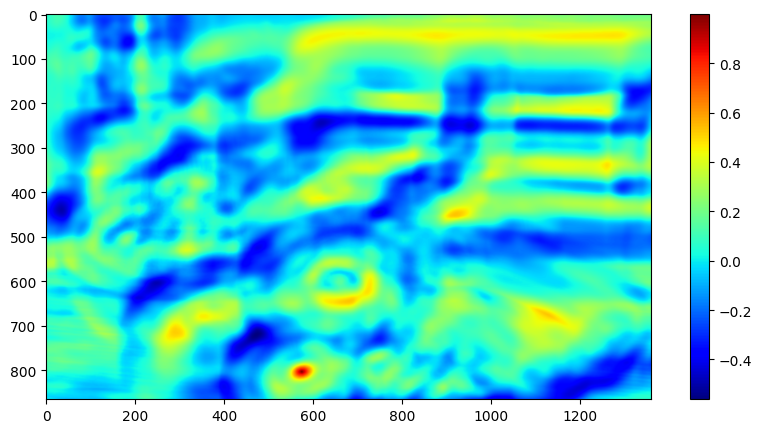

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(res, cmap="jet")
fig.colorbar(im)

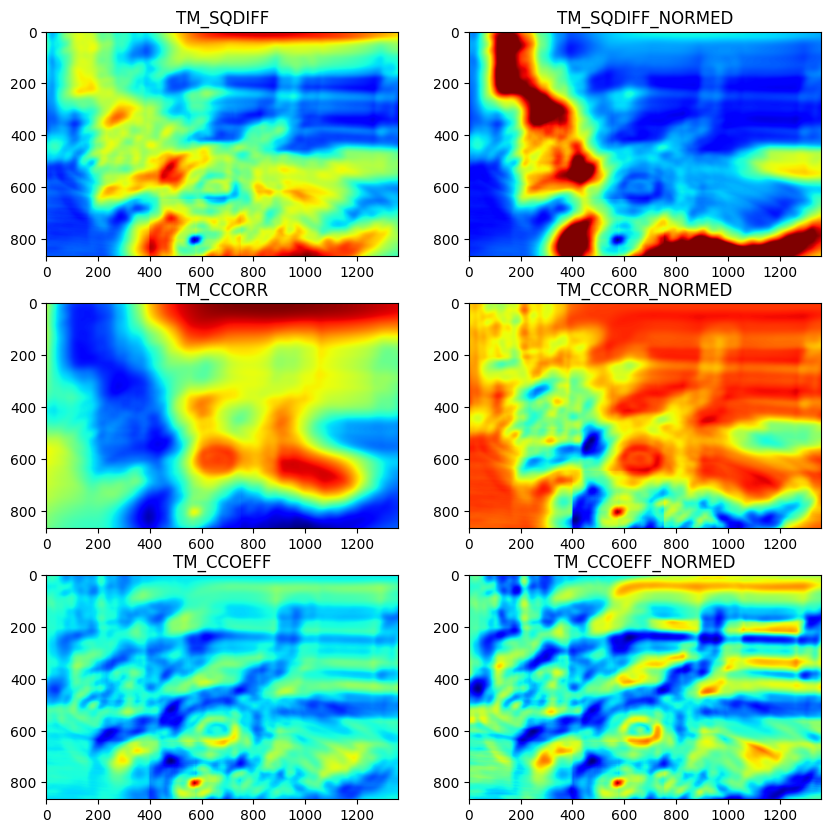

In [28]:
params = [
    "TM_SQDIFF",
    "TM_SQDIFF_NORMED",
    "TM_CCORR",
    "TM_CCORR_NORMED",
    "TM_CCOEFF",
    "TM_CCOEFF_NORMED",
]

fig = plt.figure(figsize=(10, 10))

for i, param in enumerate(params, 1):
    res = cv2.matchTemplate(img, template, getattr(cv2, param))

    ax = fig.add_subplot(3, 2, i)
    ax.set_title(param)
    ax.imshow(res, cmap="jet")

plt.show()

In [23]:
img.shape

(1024, 1536)

In [24]:
template.shape

(230, 286)